## Домашняя работа. Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income: Target feature. Binary.	Income >50K, <=50K.

In [4]:
import numpy as np
import pandas as pd
pd.__version__ # 1.4.1

'2.2.2'

In [5]:
columns='age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income'.split(',')
#df = pd.read_csv('data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [ ]:
df.tail(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [ ]:
r,c = df.shape
print(r)
print(c)

32561
15


3) Какие типы данных у элементов этого датасета?

In [ ]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


4) Какие признаки имеют пропуски?

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
workclass,1836
occupation,1843
native-country,583


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Не захотели отвечать либо данные были неподходящие, в workclass люди могут быть просто безработные

Ваш ответ:

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [ ]:
df['workclass'].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


7) Какой средний возраст женщин и мужчин?

In [ ]:
df.groupby('sex')['age'].mean()

,age
sex,
Female,36.858230
Male,39.433547


8) Постройте гистограмму(bar) распределения образования людей (education)

<Axes: title={'center': 'Распределение образования людей'}, xlabel='education'>

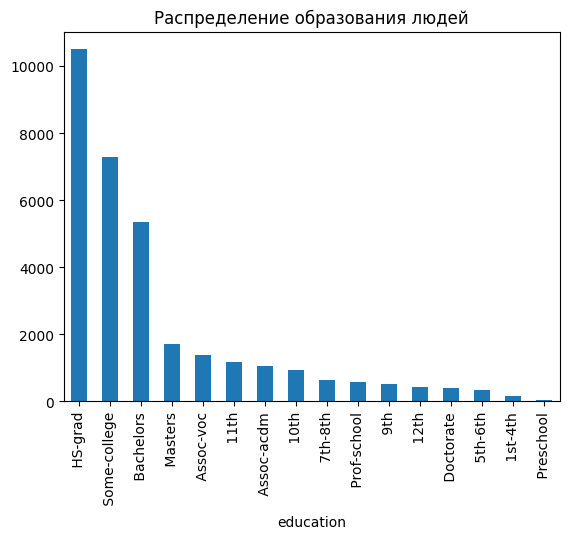

In [ ]:
ed = df['education'].value_counts()
ed.plot(kind='bar', title='Распределение образования людей')

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [ ]:
df['income_group'] = df['income'].apply(lambda x: '>50K' if x == ' >50K' else '<=50K')

df.groupby('income_group')['age'].agg(['mean', 'std'])

,mean,std
income_group,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [ ]:
ed = ['Bachelors', 'Masters', 'Doctorate']
high_earn = df[df['income'] == ' >50K']
high_earn['education'].isin(higher_education).all()

False

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [ ]:
df_men = df[df['sex'] == ' Male']
df_men['marital_category'] = df_men['marital-status'].apply(lambda x: 'Married' if x.startswith('Married') else 'Single')
df_men.groupby('marital_category')['income_group'].value_counts(normalize=True).loc[:, '>50K']

<ipython-input-78-e254c7eb52d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men['marital_category'] = df_men['marital-status'].apply(lambda x: 'Married' if x.startswith('Married') else 'Single')


,proportion
marital_category,
Married,0.440514
Single,0.084495


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [ ]:
df.groupby(['native-country', 'income_group'])['hours-per-week'].mean()

native-country  income_group
Cambodia        <=50K           41.416667
                >50K            40.000000
Canada          <=50K           37.914634
                >50K            45.641026
China           <=50K           37.381818
                                  ...    
United-States   >50K            45.505369
Vietnam         <=50K           37.193548
                >50K            39.200000
Yugoslavia      <=50K           41.600000
                >50K            49.500000
Name: hours-per-week, Length: 80, dtype: float64

13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [22]:
df['capital_diff'] = df['capital-gain'] - df['capital-loss']
df['capital_diff'] = np.log1p(df['capital_diff'].clip(lower=0))
df['capital_diff'] = df['capital_diff'].round(0)
df.pivot_table(index='education', columns='capital_diff',
                             aggfunc='size', fill_value=0)


capital_diff,0.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
education,,,,,,,,,
10th,893,1,1,5,23,5,3,0,2
11th,1122,0,5,6,21,17,4,0,0
12th,411,0,3,3,8,5,3,0,0
1st-4th,163,0,0,0,4,1,0,0,0
5th-6th,319,0,0,2,7,5,0,0,0
7th-8th,605,0,0,4,29,8,0,0,0
9th,483,2,1,7,18,2,0,0,1
Assoc-acdm,985,0,0,4,29,33,15,0,1
Assoc-voc,1248,0,2,1,59,52,19,0,1


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [ ]:
df_women = df[df['sex'] == ' Female']
df_women[df_women['income'] == ' >50K']['native-country'].value_counts()

,count
native-country,
United-States,1072
Philippines,12
Canada,9
Germany,7
England,6
China,5
Japan,5
Italy,5
Taiwan,4


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [27]:
df['magic_salary'] = df['income'].apply(lambda x: np.random.randint(0, 50) if x == ' <=50K' else np.random.randint(51, 200))
df['hourly_wage'] = df['magic_salary']*1000 / (df['hours-per-week']*48)
df.groupby('education')['hourly_wage'].mean()

,hourly_wage
education,
10th,22.424662
11th,22.864662
12th,20.571713
1st-4th,18.233079
5th-6th,18.034329
7th-8th,20.794472
9th,19.363724
Assoc-acdm,31.559911
Assoc-voc,28.682327
